In [1]:
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile
import sys
import time

import tensorflow as tf
import re
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:


# Chemin de la base de données dans Google Drive
dataset_path = "/content/drive/MyDrive/newdf.csv"


In [3]:
import pandas as pd

# Define the file path
dataset_path = "/content/drive/MyDrive/newdf.csv"

df = pd.read_csv(dataset_path , delimiter=',')

df.head()

,service_rating,cleanliness_rating,overall_rating,title,text,date
0,5.0,5.0,5.0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,17/12/2012
1,5.0,5.0,5.0,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",17/12/2012
2,4.0,5.0,4.0,“Great Stay”,This is a great property in Midtown. We two di...,18/12/2012
3,5.0,5.0,4.0,“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,17/12/2012
4,4.0,5.0,4.0,“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,17/12/2012


In [4]:
data_info = df.info()

data_null_summary = df.isnull().sum()

data_info, data_null_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   service_rating      2846 non-null   float64
 1   cleanliness_rating  2839 non-null   float64
 2   overall_rating      3000 non-null   float64
 3   title               3000 non-null   object 
 4   text                3000 non-null   object 
 5   date                3000 non-null   object 
dtypes: float64(3), object(3)
memory usage: 140.8+ KB


(None,
 service_rating        154
 cleanliness_rating    161
 overall_rating          0
 title                   0
 text                    0
 date                    0
 dtype: int64)

In [5]:
df.shape

(3000, 6)

In [6]:

# Percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

,0
service_rating,5.133333
cleanliness_rating,5.366667
overall_rating,0.000000
title,0.000000
text,0.000000
date,0.000000


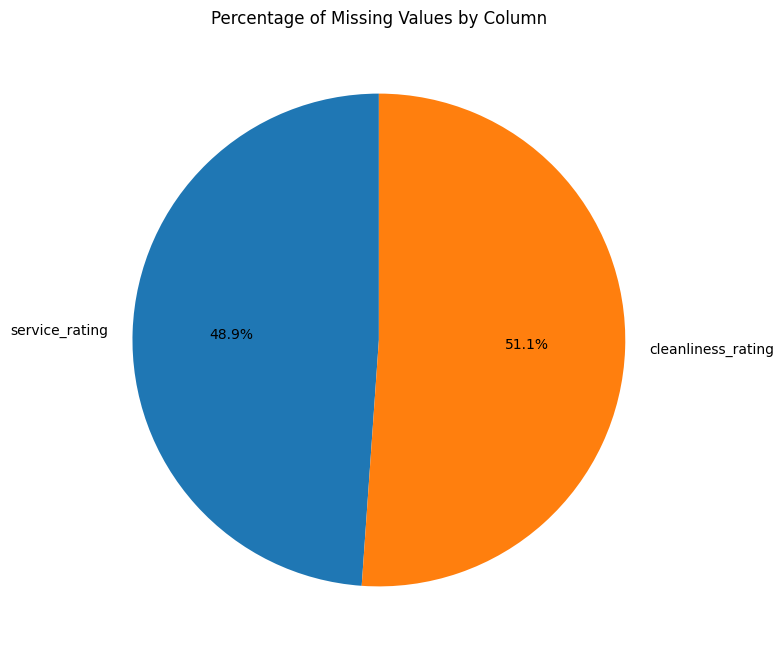

In [7]:

# Filter out columns with 0% missing values for better visualization
missing_percentage = missing_percentage[missing_percentage > 0.01]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(missing_percentage, labels=missing_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Missing Values by Column')
plt.show()


In [8]:
only_service_missing = df[df['service_rating'].isnull() & df['cleanliness_rating'].notnull()].shape[0]
only_cleanliness_missing = df[df['cleanliness_rating'].isnull() & df['service_rating'].notnull()].shape[0]
both_missing = df[df['service_rating'].isnull() & df['cleanliness_rating'].isnull()].shape[0]

print("Only service_rating missing:", only_service_missing)
print("Only cleanliness_rating missing:", only_cleanliness_missing)
print("Both missing:", both_missing)


Only service_rating missing: 14
Only cleanliness_rating missing: 21
Both missing: 140


In [9]:
df = df.dropna()


In [10]:
df.shape

(2825, 6)

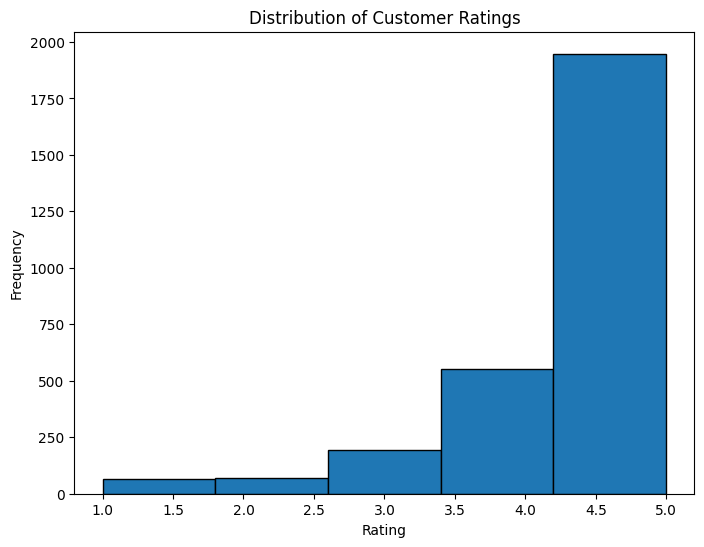

In [11]:

plt.figure(figsize=(8, 6))
plt.hist(df['service_rating'], bins=5, edgecolor='black')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
_ = plt.ylabel('Frequency')

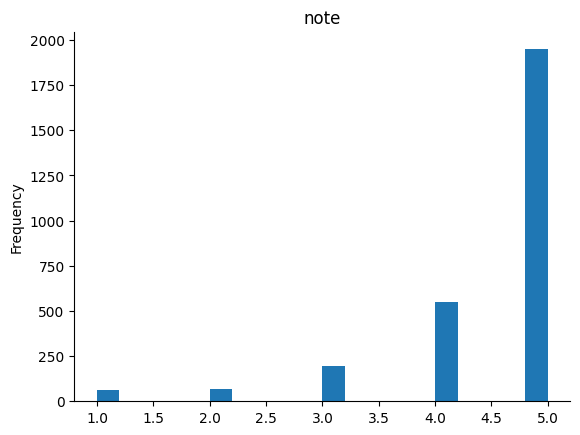

In [12]:
df['service_rating'].plot(kind='hist', bins=20, title='note')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-13-666f8a0ba4df>:11: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


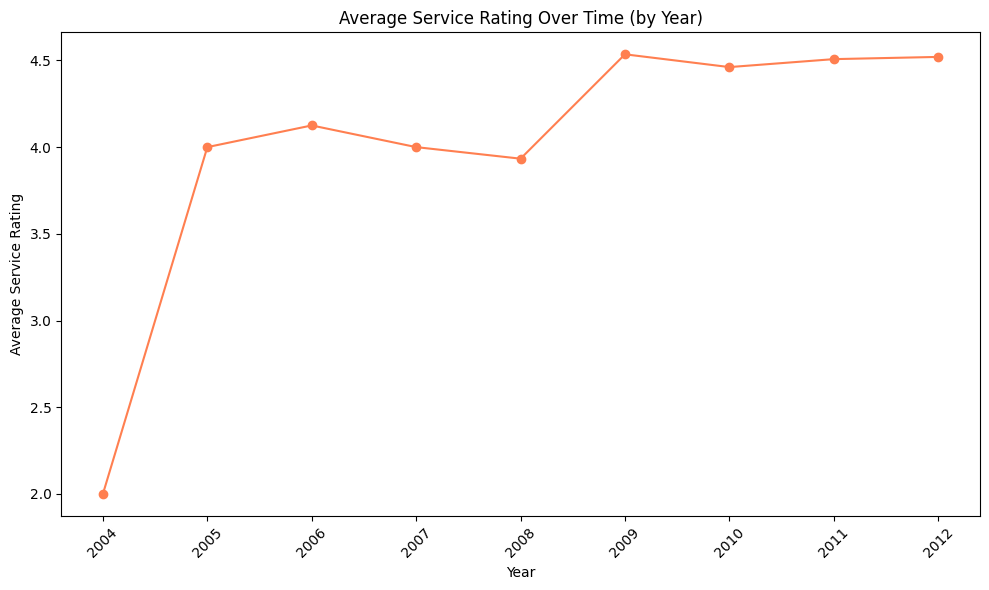

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_average_rating_over_time(df):
    """Plots the average service rating over time, grouped by year.

    Args:
        df: The pandas DataFrame containing the data.
    """
    # 1. Convert 'date' column to datetime objects if it's not already
    df['date'] = pd.to_datetime(df['date'])

    # 2. Extract the year from the 'date' column
    df['year'] = df['date'].dt.year

    # 3. Group by year and calculate average service rating
    df_time = df.groupby('year')['service_rating'].mean().reset_index()

    # 4. Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df_time['year'], df_time['service_rating'], marker='o', color='coral')
    plt.title('Average Service Rating Over Time (by Year)')
    plt.xlabel('Year')
    plt.ylabel('Average Service Rating')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.tight_layout()
    plt.show()



# Call the function with your DataFrame
plot_average_rating_over_time(df)

In [14]:
import pandas as pd
import string
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Step 2: Tokenization and frequent words analysis
def tokenize_and_clean(text):
    tokens = text.split()
    # Exclude stop words and punctuations, keep only alphabetic tokens
    tokens = [word.lower().strip(string.punctuation) for word in tokens if word.isalpha()]
    return tokens

# Apply tokenization
df['tokens'] = df['text'].apply(tokenize_and_clean)

# Count frequent words (unigrams) while ignoring stop words
all_tokens = df['tokens'].sum()
stop_words = set(CountVectorizer(stop_words='english').get_stop_words())  # Get English stop words
filtered_tokens = [word for word in all_tokens if word not in stop_words]  # Remove stop words
word_counts = Counter(filtered_tokens).most_common(20)  # Top 20 frequent words

# Step 3: Count n-grams (bigrams) excluding stop words
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
bigram_matrix = vectorizer.fit_transform(df['text'])
bigram_counts = vectorizer.get_feature_names_out()

# Display results
print("Top 20 frequent words:", word_counts)
print("Top 20 bigrams:", bigram_counts)


Top 20 frequent words: [('hotel', 3834), ('room', 2881), ('staff', 1751), ('great', 1687), ('stay', 1494), ('stayed', 1199), ('good', 1076), ('rooms', 1063), ('nice', 1020), ('service', 1019), ('just', 943), ('location', 824), ('breakfast', 803), ('like', 728), ('really', 701), ('time', 659), ('desk', 617), ('new', 616), ('free', 595), ('did', 577)]
Top 20 bigrams: ['central park' 'definitely stay' 'desk staff' 'empire state'
 'friendly helpful' 'great location' 'highly recommend' 'hotel great'
 'hotel staff' 'new york' 'recommend hotel' 'room clean' 'room service'
 'san carlos' 'staff friendly' 'staff helpful' 'stay hotel' 'stayed hotel'
 'times square' 'walking distance']


In [15]:
df

,service_rating,cleanliness_rating,overall_rating,title,text,date,year,tokens
0,5.0,5.0,5.0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,2012-12-17,2012,"[stayed, in, a, king, suite, for, nights, and,..."
1,5.0,5.0,5.0,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,2012,"[on, every, visit, to, the, hotel, beacon, is,..."
2,4.0,5.0,4.0,“Great Stay”,This is a great property in Midtown. We two di...,2012-12-18,2012,"[this, is, a, great, property, in, we, two, di..."
3,5.0,5.0,4.0,“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,2012-12-17,2012,"[the, andaz, is, a, nice, hotel, in, a, centra..."
4,4.0,5.0,4.0,“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,2012-12-17,2012,"[i, have, stayed, at, each, of, the, us, andaz..."
...,...,...,...,...,...,...,...,...
2995,5.0,5.0,5.0,“Outcome of event”,I can not even begin to brag enough on the sta...,2011-11-02,2011,"[i, can, not, even, begin, to, brag, enough, o..."
2996,3.0,5.0,4.0,“Ultra trendy and stylish... and just a little...,I had read that Hotel Sorella was the latest a...,2009-12-15,2009,"[i, had, read, that, hotel, sorella, was, the,..."
2997,4.0,5.0,4.0,"“Very modern, very clean, very happy :)”","Hotel Sorella was very clean, simple, modern, ...",2009-12-12,2009,"[hotel, sorella, was, very, good, worth, every..."
2998,5.0,5.0,4.0,"“New, Crisp with attention to detail”",I found a great deal at this hotel and it is b...,2009-11-30,2009,"[i, found, a, great, deal, at, this, hotel, an..."


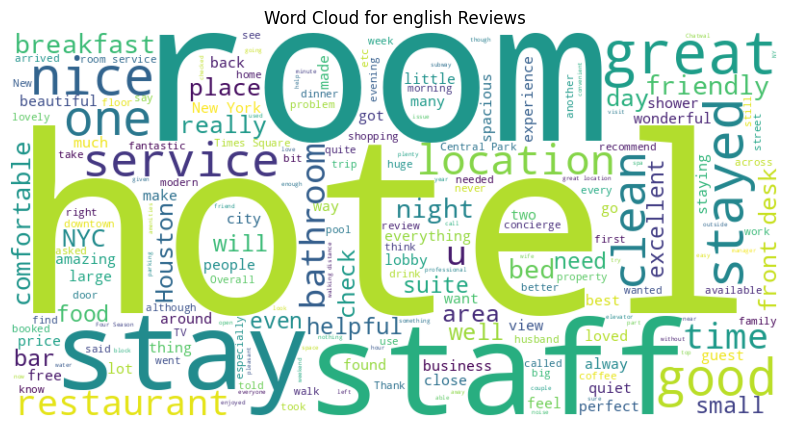

In [16]:
from wordcloud import WordCloud

text = " ".join(review for review in df['text'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for english Reviews")
plt.show()


In [17]:
from textblob import TextBlob

def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0

df['sentiment_score'] = df['text'].apply(get_sentiment)

In [18]:
df.sort_values(by=['sentiment_score'], ascending=False).head(100)

,service_rating,cleanliness_rating,overall_rating,title,text,date,year,tokens,sentiment_score
1819,5.0,5.0,5.0,“Our wedding at the Fourseasons”,We had our wedding at the fourseasons just cou...,2012-03-21,2012,"[we, had, our, wedding, at, the, fourseasons, ...",1.000000
2432,5.0,5.0,5.0,“Best hotel ever stayed in”,We stayed at the Setai for a weekend to celebr...,2012-04-11,2012,"[we, stayed, at, the, setai, for, a, weekend, ...",1.000000
962,5.0,5.0,4.0,“Nice stay.”,What a 5-star hotel should be. Service was top...,2012-07-15,2012,"[what, a, hotel, should, service, was, the, st...",1.000000
1108,4.0,5.0,3.0,“Avis partagé”,"les + : Superbes chambres, spacieuses et bien ...",2012-02-12,2012,"[les, superbes, spacieuses, et, bien, équipées...",1.000000
156,5.0,5.0,5.0,“Highly Recommended”,"Location, attention to detail, size of room, c...",2012-07-23,2012,"[attention, to, size, of, staff, just, excelle...",1.000000
...,...,...,...,...,...,...,...,...,...
948,5.0,5.0,5.0,“Best Hotel for Conference”,Just got back from a 5 day stay for a conferen...,2012-09-20,2012,"[just, got, back, from, a, day, stay, for, a, ...",0.598333
1052,5.0,5.0,5.0,“Exactly what I expect of a Four Seasons prope...,"Four Seasons Houston is a great hotel for a ""s...",2012-07-11,2012,"[four, seasons, houston, is, a, great, hotel, ...",0.596667
1812,5.0,5.0,5.0,“WOW!!”,Amazing! Love this place!! Staff is great the ...,2012-08-12,2012,"[love, this, staff, is, great, the, people, th...",0.596625
2864,4.0,5.0,4.0,“Love the hotel but long for a view”,Thus was my fifth stay. I keep hoping for a ri...,2012-06-29,2012,"[thus, was, my, fifth, i, keep, hoping, for, a...",0.595833


The best 100

In [19]:
df

,service_rating,cleanliness_rating,overall_rating,title,text,date,year,tokens,sentiment_score
0,5.0,5.0,5.0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,2012-12-17,2012,"[stayed, in, a, king, suite, for, nights, and,...",0.276871
1,5.0,5.0,5.0,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,2012,"[on, every, visit, to, the, hotel, beacon, is,...",0.315806
2,4.0,5.0,4.0,“Great Stay”,This is a great property in Midtown. We two di...,2012-12-18,2012,"[this, is, a, great, property, in, we, two, di...",0.405000
3,5.0,5.0,4.0,“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,2012-12-17,2012,"[the, andaz, is, a, nice, hotel, in, a, centra...",0.266853
4,4.0,5.0,4.0,“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,2012-12-17,2012,"[i, have, stayed, at, each, of, the, us, andaz...",0.226535
...,...,...,...,...,...,...,...,...,...
2995,5.0,5.0,5.0,“Outcome of event”,I can not even begin to brag enough on the sta...,2011-11-02,2011,"[i, can, not, even, begin, to, brag, enough, o...",0.238796
2996,3.0,5.0,4.0,“Ultra trendy and stylish... and just a little...,I had read that Hotel Sorella was the latest a...,2009-12-15,2009,"[i, had, read, that, hotel, sorella, was, the,...",0.119697
2997,4.0,5.0,4.0,"“Very modern, very clean, very happy :)”","Hotel Sorella was very clean, simple, modern, ...",2009-12-12,2009,"[hotel, sorella, was, very, good, worth, every...",0.325648
2998,5.0,5.0,4.0,"“New, Crisp with attention to detail”",I found a great deal at this hotel and it is b...,2009-11-30,2009,"[i, found, a, great, deal, at, this, hotel, an...",0.319242


In [20]:
def map_sentiment(score):
    if score > 0.1:  # Sentiment positif
        return "positive"
    elif score < -0.1:  # Sentiment négatif
        return "negative"
    else:  # Sentiment neutre
        return "neutral"

df['sentiment'] = df['sentiment_score'].apply(map_sentiment)

# Aperçu des données après l'ajout des colonnes
df.head()

,service_rating,cleanliness_rating,overall_rating,title,text,date,year,tokens,sentiment_score,sentiment
0,5.0,5.0,5.0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,2012-12-17,2012,"[stayed, in, a, king, suite, for, nights, and,...",0.276871,positive
1,5.0,5.0,5.0,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,2012,"[on, every, visit, to, the, hotel, beacon, is,...",0.315806,positive
2,4.0,5.0,4.0,“Great Stay”,This is a great property in Midtown. We two di...,2012-12-18,2012,"[this, is, a, great, property, in, we, two, di...",0.405000,positive
3,5.0,5.0,4.0,“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,2012-12-17,2012,"[the, andaz, is, a, nice, hotel, in, a, centra...",0.266853,positive
4,4.0,5.0,4.0,“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,2012-12-17,2012,"[i, have, stayed, at, each, of, the, us, andaz...",0.226535,positive


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['sentiment'], test_size=0.2, random_state=42
)

# Vectoriser les avis avec TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entraîner un modèle Random Forest
rf_sentiment_model = RandomForestClassifier(random_state=42)
rf_sentiment_model.fit(X_train_tfidf, y_train)

# Évaluer le modèle
y_pred = rf_sentiment_model.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.00      0.00      0.00        49
    positive       0.91      1.00      0.95       513

    accuracy                           0.90       565
   macro avg       0.30      0.33      0.32       565
weighted avg       0.82      0.90      0.86       565

Accuracy: 0.90


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
df

,service_rating,cleanliness_rating,overall_rating,title,text,date,year,tokens,sentiment_score,sentiment
0,5.0,5.0,5.0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,2012-12-17,2012,"[stayed, in, a, king, suite, for, nights, and,...",0.276871,positive
1,5.0,5.0,5.0,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,2012,"[on, every, visit, to, the, hotel, beacon, is,...",0.315806,positive
2,4.0,5.0,4.0,“Great Stay”,This is a great property in Midtown. We two di...,2012-12-18,2012,"[this, is, a, great, property, in, we, two, di...",0.405000,positive
3,5.0,5.0,4.0,“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,2012-12-17,2012,"[the, andaz, is, a, nice, hotel, in, a, centra...",0.266853,positive
4,4.0,5.0,4.0,“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,2012-12-17,2012,"[i, have, stayed, at, each, of, the, us, andaz...",0.226535,positive
...,...,...,...,...,...,...,...,...,...,...
2995,5.0,5.0,5.0,“Outcome of event”,I can not even begin to brag enough on the sta...,2011-11-02,2011,"[i, can, not, even, begin, to, brag, enough, o...",0.238796,positive
2996,3.0,5.0,4.0,“Ultra trendy and stylish... and just a little...,I had read that Hotel Sorella was the latest a...,2009-12-15,2009,"[i, had, read, that, hotel, sorella, was, the,...",0.119697,positive
2997,4.0,5.0,4.0,"“Very modern, very clean, very happy :)”","Hotel Sorella was very clean, simple, modern, ...",2009-12-12,2009,"[hotel, sorella, was, very, good, worth, every...",0.325648,positive
2998,5.0,5.0,4.0,"“New, Crisp with attention to detail”",I found a great deal at this hotel and it is b...,2009-11-30,2009,"[i, found, a, great, deal, at, this, hotel, an...",0.319242,positive


In [24]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Vérifiez que votre dataset inclut une colonne pour le texte et une colonne pour les labels (stars)
text_column = "text"  # Nom de la colonne contenant le texte
label_column = "service_rating"  # Nom de la colonne cible

# Encode les labels si nécessaire (classification)
label_encoder = LabelEncoder()
df[label_column] = label_encoder.fit_transform(df[label_column])

# Divisez les données
X_train, X_val, y_train, y_val = train_test_split(
    df[text_column],
    df[label_column],
    test_size=0.2,
    random_state=42
)

# Chargement du tokenizer et du modèle pré-entraîné
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_encoder.classes_))

# Tokenisation des données
def encode_data(texts, labels, tokenizer, max_length=128):
    inputs = tokenizer(
        list(texts),
        return_tensors="tf",
        truncation=True,
        padding=True,
        max_length=max_length
    )
    return inputs, tf.convert_to_tensor(labels)

train_inputs, train_labels = encode_data(X_train, y_train, tokenizer)
val_inputs, val_labels = encode_data(X_val, y_val, tokenizer)

# Définir les paramètres d'entraînement
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)
# Entraînement du modèle
history = model.fit(
    train_inputs,
    train_labels,
    validation_data=(val_inputs, val_labels),
    epochs=1,
    batch_size=16
)

# Évaluation
results = model.evaluate(val_inputs, val_labels)
print(f"Validation Accuracy: {results[1]}")


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


142/142 [==============================] - ETA: 0s - loss: 0.8686 - sparse_categorical_accuracy: 0.6978 

ValueError: Cannot generate a hashable key for IteratorSpec(({'input_ids': TensorSpec(shape=(None, 128), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, 128), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 128), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None)),) because the _serialize() method returned an unsupproted value of type <class 'transformers.tokenization_utils_base.BatchEncoding'>

In [22]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Vérifiez que votre dataset inclut une colonne pour le texte et une colonne pour les labels (service_rating)
text_column = "text"  # Nom de la colonne contenant le texte
label_column = "service_rating"  # Nom de la colonne cible

# Encode les labels si nécessaire (classification)
label_encoder = LabelEncoder()
df[label_column] = label_encoder.fit_transform(df[label_column])

# Divisez les données
X_train, X_val, y_train, y_val = train_test_split(
    df[text_column],
    df[label_column],
    test_size=0.2,
    random_state=42
)

# Chargement du tokenizer et du modèle DistilBERT pré-entraîné
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = TFDistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=len(label_encoder.classes_)
)

# Tokenisation des données avec une longueur maximale réduite
def encode_data(texts, labels, tokenizer, max_length=64):
    inputs = tokenizer(
        list(texts),
        return_tensors="tf",
        truncation=True,
        padding=True,
        max_length=max_length
    )
    return inputs, tf.convert_to_tensor(labels)

train_inputs, train_labels = encode_data(X_train, y_train, tokenizer, max_length=64)
val_inputs, val_labels = encode_data(X_val, y_val, tokenizer, max_length=64)

# Définir les paramètres d'entraînement
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Callback pour arrêter l'entraînement si la validation n'améliore plus
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Entraînement du modèle avec un batch size réduit
history = model.fit(
    {'input_ids': train_inputs['input_ids'], 'attention_mask': train_inputs['attention_mask']},
    train_labels,
    validation_data=(
        {'input_ids': val_inputs['input_ids'], 'attention_mask': val_inputs['attention_mask']},
        val_labels
    ),
    epochs=1,
    batch_size=16,
    callbacks=[callback]
)

# Évaluation
results = model.evaluate(
    {'input_ids': val_inputs['input_ids'], 'attention_mask': val_inputs['attention_mask']},
    val_labels
)
print(f"Validation Accuracy: {results[1]}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

18/18 [==============================] - 62s 3s/step - loss: 0.9162 - sparse_categorical_accuracy: 0.6619
Validation Accuracy: 0.6619468927383423


In [24]:
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=2, workers=4)

# Save the model for future use
word2vec_model.save("word2vec_model.model")
# Display similar words
print("Most similar words to 'best':")
print(word2vec_model.wv.most_similar('best', topn=10))

Most similar words to 'best':
[('nicest', 0.8927335739135742), ('most', 0.8920965790748596), ('property', 0.8527124524116516), ('andaz', 0.8518364429473877), ('part', 0.844883918762207), ('strength', 0.8392191529273987), ('iroquois', 0.8364273309707642), ('sorella', 0.8293671607971191), ('hilton', 0.8292145729064941), ('ever', 0.8289951682090759)]


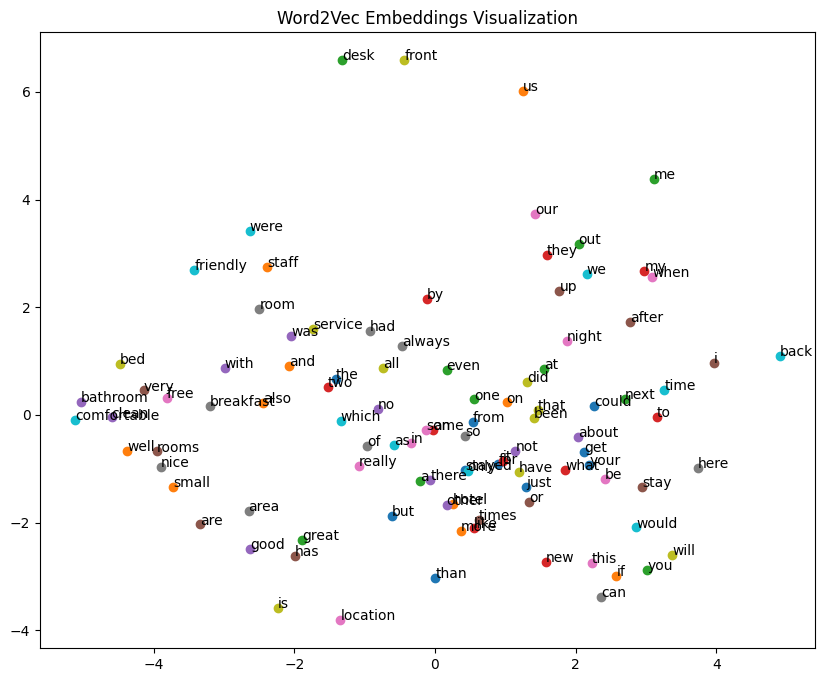

In [31]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
word_vectors = word2vec_model.wv
words = list(word_vectors.index_to_key)
word_vecs = word_vectors[words]

pca = PCA(n_components=2)
reduced_vecs = pca.fit_transform(word_vecs[:100])  # Visualize only top 100 words

# Plot the embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(words[:100]):
    plt.scatter(reduced_vecs[i, 0], reduced_vecs[i, 1])
    plt.annotate(word, (reduced_vecs[i, 0], reduced_vecs[i, 1]))
plt.title("Word2Vec Embeddings Visualization")
plt.show()


In [32]:

!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 17.4 MB/s eta 0:00:00


In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
import gensim

# Télécharger les ressources nécessaires de NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    """
    Clean and preprocess the text for topic modeling.
    """
    # Stopwords in English
    stop_words = set(stopwords.words('english'))
    # Add domain-specific stopwords
    domain_stopwords = {'insurance', 'service', 'price', 'contract'}
    # Combine all stopwords
    all_stopwords = stop_words.union(domain_stopwords)

    # Tokenize, convert to lowercase, and lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    clean_tokens = [
        lemmatizer.lemmatize(word) for word in tokens
        if word.isalnum() and word not in all_stopwords  # Keep alphanumeric tokens and remove stopwords
    ]
    return clean_tokens

# Prétraiter les textes
df['tokens'] = df['text'].apply(preprocess_text)

# Étape 2 : Créer le dictionnaire et le corpus
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

# Étape 3 : Appliquer le modèle LDA
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,  # Nombre de topics
    passes=10,     # Nombre de passes pour améliorer la convergence
    random_state=42
)

# Afficher les topics
print("Topics extraits par LDA :")
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topics extraits par LDA :
Topic 0: 0.038*"hotel" + 0.022*"room" + 0.016*"great" + 0.015*"staff" + 0.013*"stay" + 0.008*"stayed" + 0.008*"location" + 0.007*"time" + 0.006*"would" + 0.006*"nice"
Topic 1: 0.026*"room" + 0.018*"hotel" + 0.014*"good" + 0.010*"breakfast" + 0.010*"nice" + 0.009*"stay" + 0.008*"clean" + 0.008*"would" + 0.008*"bed" + 0.007*"free"
Topic 2: 0.018*"room" + 0.015*"u" + 0.013*"hotel" + 0.008*"would" + 0.008*"desk" + 0.007*"day" + 0.007*"back" + 0.007*"stay" + 0.007*"front" + 0.006*"night"
Topic 3: 0.027*"room" + 0.015*"hotel" + 0.008*"time" + 0.008*"one" + 0.006*"staff" + 0.006*"would" + 0.006*"u" + 0.005*"desk" + 0.005*"like" + 0.005*"could"
Topic 4: 0.007*"hotel" + 0.006*"e" + 0.006*"und" + 0.005*"da" + 0.004*"la" + 0.003*"die" + 0.003*"im" + 0.003*"salad" + 0.003*"ist" + 0.003*"good"
